# Metrics on Medium

Medium Stats is a tool where you can view traffic and visitor statistics for posts that you publish on the platform.

### Medium Stats Data Collection

The goal is to scrape baseline stats on stories from https://medium.com/me/stats in order to get a better understanding of how readers engage with datadice mediumn articles.

I started with creating 2 different datasets

1. Using Selenium to scrape data directly from datadice medium stat poge
2. From the datadice medium stat page, right click and save the file as 'stat.json'. Using a html parser, the data can be transformed into a datafame

Finally the 2 dataframes can be merged, and the analysis can begin.

.

#### SELENIUM SCRAPPING

In [45]:
# Imports the required libraries
from selenium import webdriver
import time
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd

In [46]:
# Input Google login info to get into Medium ( confidential data )
USER = ''
PASS = ''

In [144]:
# Goes through splash and login process
from selenium.webdriver.common.by import By
def splash_process(driver, email, password):
    
    # Goes to sign in page
    driver.get('https://medium.com/m/signin')

    # Clicks sign in button
#    driver.find_element_by_xpath(".//button[contains(.,'All sign in options')]").click()
    time.sleep(3)
    # Clicks sign in with Google
    driver.find_element(By.XPATH,'//*[@id="susi-modal-google-button"]/a').click()
    
    #driver.find_element_by_xpath(".//button[contains(.,'Sign in with Google')]").click()
    time.sleep(1)
    # Finds email field
    email_field = driver.find_element_by_id("identifierId")
    time.sleep(1)
    # Types in email
    email_field.send_keys(email)

    # Clicks next button
    driver.find_element_by_id("identifierNext").click()

    # Wait a sec
    time.sleep(5)

    # Finds password field
    pass_field = driver.find_element_by_name("password")
    time.sleep(5)
    # Types in password
    pass_field.send_keys(password)

    # Click next button
    driver.find_element_by_id("passwordNext").click()
    
    # Wait a sec
    time.sleep(10)
    
    # Go to stats page and return it 
    driver.get('https://medium.com/me/stats')
    time.sleep(10)

In [48]:
# Scrolls to bottom to get all posts into view
def scroll(driver):

    # Get scroll height
    last_height = driver.execute_script("return document.body.scrollHeight")

    while True:
        # Scroll down to bottom
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Wait to load page
        time.sleep(5)

        # Calculate new scroll height and compare with last scroll height
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

In [145]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
#Here the selenium webdriver gets into the browser request called the test automated browser (aka bot) 
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))




====== WebDriver manager ======
Current google-chrome version is 97.0.4692
Get LATEST chromedriver version for 97.0.4692 google-chrome
Driver [/Users/deborahmenezes/.wdm/drivers/chromedriver/mac64/97.0.4692.71/chromedriver] found in cache


In [147]:
# Log in!
splash_process(driver, USER, PASS)
scroll(driver)

/var/folders/ff/yy0n6l355vlgtrrd503kz0_c0000gn/T/ipykernel_47851/662438906.py:17: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  email_field = driver.find_element_by_id("identifierId")
/var/folders/ff/yy0n6l355vlgtrrd503kz0_c0000gn/T/ipykernel_47851/662438906.py:23: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id("identifierNext").click()
/var/folders/ff/yy0n6l355vlgtrrd503kz0_c0000gn/T/ipykernel_47851/662438906.py:29: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  pass_field = driver.find_element_by_name("password")
/var/folders/ff/yy0n6l355vlgtrrd503kz0_c0000gn/T/ipykernel_47851/662438906.py:35: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_id("passwordNext").click()


In [122]:
#Gebs the path to each blog to fetch the details out from it
from selenium.webdriver.common.by import By
driver.get('https://medium.com/me/stats')
time.sleep(4)
scroll(driver)

blog_posts = []

for i in range(1, 57):
    try:
        blog_post = driver.find_element(By.XPATH, f"/html/body/div[1]/div[2]/div/div[3]/div/div[5]/table/tbody/tr[{i}]/td[1]/div/a")
        reff = blog_post.get_attribute('href')
        blog_posts.append(reff)
    except:
        pass

In [123]:
blog_name = []
InternalPercentage  = []
ExternalPercentage  = []
Emails  = []
AndroidDevice  = []
Google  = []
linkedIn  = []
for blog in blog_posts:
    driver.get(blog)
    time.sleep(3)
    
    #blogname = driver.find_element(By.XPATH, '/html/body/div/div/div[4]/div[1]/div/div[1]/div[1]/div[2]/div[2]/h2/a') 
    #soup = BeautifulSoup(blogname, 'html.parser')
    #blog_name.append(blogname.get_attribute(soup.select('a')))
    
    intviews = driver.find_element(By.XPATH, '/html/body/div/div/div[4]/div[2]/div/div/div/div[1]/div/div[2]/h3')    
    InternalPercentage.append(intviews.get_attribute('innerHTML'))
    
    exviews = driver.find_element(By.XPATH, '/html/body/div/div/div[4]/div[2]/div/div/div/div[1]/div/div[4]/div[1]/h3')    
    ExternalPercentage.append(exviews.get_attribute('innerHTML'))
 
    mail = driver.find_element(By.XPATH, '/html/body/div/div/div[4]/div[2]/div/div/div/div[1]/div/div[4]/div[2]/div/h3')    
    Emails.append(mail.get_attribute('innerHTML'))
                            
    device = driver.find_element(By.XPATH, '/html/body/div/div/div[4]/div[2]/div/div/div/div[1]/div/div[4]/div[3]/div/h3')    
    AndroidDevice.append(device.get_attribute('innerHTML'))
 
    google = driver.find_element(By.XPATH, '/html/body/div/div/div[4]/div[2]/div/div/div/div[1]/div/div[4]/div[4]/div/h3')    
    Google.append(google.get_attribute('innerHTML'))
    
    linkedin = driver.find_element(By.XPATH, '/html/body/div/div/div[4]/div[2]/div/div/div/div[1]/div/div[4]/div[5]/div/h3')    
    linkedIn.append(linkedin.get_attribute('innerHTML'))
    
    
    
print(InternalPercentage[1], ExternalPercentage[1], Emails[1], AndroidDevice[1], Google[1], linkedIn[1])    
    
    

38% 63% 34 12 3 2


In [124]:
df_blogdetails = pd.DataFrame(data={'InternalPercentage': InternalPercentage, 'ExternalPercentage': ExternalPercentage,'Emails': Emails,
                        'AndroidDevice': AndroidDevice, 'Google': Google, 'linkedIn': linkedIn})
                        

In [125]:
df_blogdetails.tail()

,InternalPercentage,ExternalPercentage,Emails,AndroidDevice,Google,linkedIn
36,22%,78%,75,37,3,3
37,7%,93%,2.6K,1.4K,1.1K,132
38,36%,64%,166,154,37,6
39,21%,79%,418,70,5,4
40,24%,76%,37,16,2,2


In [156]:
# Grab the main table html from Medium stats by using the element by.
driver.get('https://medium.com/me/stats')
time.sleep(10)
table = driver.find_element(By.CLASS_NAME,'js-statsTableBody')

In [140]:
# Get the raw html from our table element
raw_html = table.get_attribute('innerHTML')

In [141]:
# Preview html
#print(raw_html)

In [142]:
# Quit our driver
driver.quit()

In [130]:
# Clean html  
soup = BeautifulSoup(raw_html, 'html.parser')

In [131]:
# Story titles
titles = [item.text for i, item in enumerate(soup.select('a'))]
print(titles[0])

New Data Studio feature: Report Theme in Navigation


In [132]:
#fetching out the story title 
TitleName = []
for title in titles:
    if len(title) > 15:
        TitleName.append(title)
        
print(len(TitleName), TitleName[0])    

10 New Data Studio feature: Report Theme in Navigation


In [133]:
#fetching out the publishing names 
results = []
for i, j in enumerate(titles):
  if j == 'View story':
    if i > 0:
      results.append(titles[i-1])
    else:
      results.append(None)



PublishingName = []
for result in results:
    if len(result) < 18:
        PublishingName.append(result)
    else:
        PublishingName.append(None)
        
        
print(len(PublishingName), PublishingName[0]) 

10 None


In [139]:
# Reading times
ReadTime = [item.get('title') for i, item in enumerate(soup.findAll('span', {'class':'readingTime'}))]
print(len(ReadTime), ReadTime[0])

10 3 min read


In [138]:
#Get all numerical metrics
nums = [item.text for i, item in enumerate(soup.findAll('span', {'class':'sortableTable-value'})) if (len(item.text) < 13 or '.' in item.text)]

# Views
Views = nums[::4]
print(len(Views), Views[0])

10 87


In [135]:
# Reads
Reads = nums[1::4]
print(len(Reads), Reads[0])


10 61


In [136]:
# Read ratio
ReadRatio = nums[2::4]
print(len(ReadRatio),ReadRatio[0])


10 70.11494252873563


In [137]:
# Fans
Fans = nums[3::4]
print(len(Fans), Fans[0])

10 1


In [393]:
# Create dataframe
df = pd.DataFrame(data={'TitleName': TitleName, 'PublishingName': PublishingName,'ReadTime': ReadTime,'Views': Views, 
                        'Reads': Reads, 'ReadRatio': ReadRatio, 'Fans': Fans})

In [394]:
# Reorder columns
df_selenium = df[['TitleName','PublishingName','ReadTime', 'Views', 'Reads', 'ReadRatio', 'Fans']]

In [562]:
# Preview
df_selenium.head(2)

,TitleName,PublishingName,ReadTime,Views,Reads,ReadRatio,Fans
0,Latest Updates on Google Data Analytics (Decem...,Geek Culture,4,57,22,38.596491,5
1,The Wrangler User Interface of Cloud Data Fusion,None,5,62,37,59.677419,4


In [398]:
# Overview
df_selenium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   TitleName       40 non-null     object
 1   PublishingName  35 non-null     object
 2   ReadTime        40 non-null     object
 3   Views           40 non-null     object
 4   Reads           40 non-null     object
 5   ReadRatio       40 non-null     object
 6   Fans            40 non-null     object
dtypes: object(7)
memory usage: 2.3+ KB


In [399]:
# Convert numerical features to floats
df_selenium = df_selenium.apply(pd.to_numeric, errors='ignore')
df_selenium['ReadTime'] = df_selenium['ReadTime'].apply(lambda x: int(x.split()[0]))
df_selenium.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TitleName       40 non-null     object 
 1   PublishingName  35 non-null     object 
 2   ReadTime        40 non-null     int64  
 3   Views           40 non-null     int64  
 4   Reads           40 non-null     int64  
 5   ReadRatio       40 non-null     float64
 6   Fans            40 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 2.3+ KB


In [400]:
# Numerical overview
df_selenium.describe()

,ReadTime,Views,Reads,ReadRatio,Fans
count,40.000000,40.000000,40.000000,40.000000,40.000000
mean,5.025000,580.175000,264.350000,47.956546,8.250000
std,1.049725,957.582851,346.702455,9.344947,5.290291
min,3.000000,57.000000,22.000000,25.118483,3.000000
25%,4.000000,196.500000,82.750000,41.904943,5.750000
50%,5.000000,282.000000,130.500000,48.084416,7.000000
75%,6.000000,570.000000,286.500000,55.661228,9.000000
max,7.000000,5884.000000,1815.000000,61.307420,35.000000


.

## Creating a dataframe from our medium site by downloading the stats in a json format

In [296]:
string = open('mystat.json', 'r', encoding='utf-8').read()

# Remove unnecessary preceding characters and save as DataFrame
df=pd.DataFrame(json.loads(re.sub(r'^.*?{', '{', string)))

# Extract story stats 
df_stories=pd.json_normalize(df.loc['value', 'payload'], sep='_')

In [298]:
# ------------------------------- Setup -------------------------------- #
import pandas as pd
import json
import re
pd.options.display.max_columns=200

# -------------------- Extract Medium Story Stats ---------------------- #

# Read text file
string = open('mystat.json', 'r', encoding='utf-8').read()

# Remove unnecessary preceding characters and save as DataFrame
df=pd.DataFrame(json.loads(re.sub(r'^.*?{', '{', string)))

# Extract story stats 
df_stories=pd.json_normalize(df.loc['value', 'payload'], sep='_')


# ------------------- Bonus: User and Publications --------------------- #

# Create a reference DataFrame
ref=pd.json_normalize(df.loc['references', 'payload'], max_level=1, sep='_')

# Extract User and Publication information
df_publications=pd.DataFrame()

for i in ref.columns:
    if i[:4]=='User':
        df_user=pd.json_normalize(ref.loc[0,i], sep='_')
    elif i[:4]=='Coll':
        tmp=pd.json_normalize(ref.loc[0,i], sep='_')
        df_publications=pd.concat([df_publications, tmp], axis=0)
    else: print("new Category Found: "+i)


# ---------- Bonus 2: Convert Timestamps to readable format  ----------- #

# Convert timestamps to readable datetime
date_fields=['createdAt', 'firstPublishedAt', 'primaryTopic_createdAt']
for j in date_fields:
    df_stories[j]=pd.to_datetime(df_stories[j], unit='ms')

In [563]:
#view the dataframe 
df_stories.head(2)

,postId,slug,title,creatorId,collectionId,upvotes,views,reads,createdAt,firstPublishedAt,visibility,firstPublishedAtBucket,readingTime,syndicatedViews,claps,updateNotificationSubscribers,isSeries,internalReferrerViews,friendsLinkViews,type,previewImage_id,previewImage_originalWidth,previewImage_originalHeight,previewImage_isFeatured,primaryTopic_topicId,primaryTopic_slug,primaryTopic_createdAt,primaryTopic_deletedAt,primaryTopic_image_id,primaryTopic_image_originalWidth,primaryTopic_image_originalHeight,primaryTopic_name,primaryTopic_description,primaryTopic_relatedTopics,primaryTopic_visibility,primaryTopic_relatedTags,primaryTopic_relatedTopicIds,primaryTopic_seoTitle,primaryTopic_type
0,b8b6cb80218f,latest-updates-on-google-data-analytics-decemb...,Latest Updates on Google Data Analytics (Decem...,2851976d5ad7,9758482ba857,5,55,22,2022-01-10 12:50:48.355,2022-01-12 09:03:02.129,0,January 2022,4,2,201,0,False,20,0,PostStat,0*kOMyI_gFv6djFic5,1600.0,1066.0,True,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21e96cfe1b2d,the-wrangler-user-interface-of-cloud-data-fusion,The Wrangler User Interface of Cloud Data Fusion,2851976d5ad7,NaN,4,58,34,2021-12-23 13:13:23.249,2021-12-23 13:30:58.275,0,December 2021,5,0,200,0,False,17,0,PostStat,0*Ewq7TamyPHZRIqdf,1600.0,1066.0,True,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [622]:
#Taking only the relevant data that is necxessary for the analysis#
df_rawhtml = pd.DataFrame(df_stories, columns=['createdAt', 'claps','internalReferrerViews','primaryTopic_name'   ])



In [623]:
df_rawhtml.head(2)

,createdAt,claps,internalReferrerViews,primaryTopic_name
0,2022-01-10 12:50:48.355,201,20,NaN
1,2021-12-23 13:13:23.249,200,17,NaN


In [624]:
#Merging the two dataframes, df_selenium and df_rawhtml joining with the title 
df_stats  = pd.concat([df_selenium, df_rawhtml], axis=1, join="inner")

In [684]:
from datetime import datetime
df_stats['Date'] = df_stats['createdAt'].dt.date

In [685]:
df_stats.head(2)

,TitleName,PublishingName,ReadTime,Views,Reads,ReadRatio,Fans,createdAt,claps,internalReferrerViews,primaryTopic_name,FanRatio,Date
0,Latest Updates on Google Data Analytics (Decem...,Geek Culture,4,57,22,38.596491,5,2022-01-10 12:50:48.355,201,20,NaN,8.771930,2022-01-10
1,The Wrangler User Interface of Cloud Data Fusion,None,5,62,37,59.677419,4,2021-12-23 13:13:23.249,200,17,NaN,6.451613,2021-12-23


In [339]:
df_stats = pd.read_csv('Datadice_Medium_Stats_Modifi.csv')

In [341]:
df1 = pd.read_csv('medium_referrals.csv')

In [342]:
#Merging the two dataframes, df_selenium and df_rawhtml joining with the title 
df_stats  = pd.concat([df_stats, df1], axis=1, join="inner")

In [350]:
df_stats.head()

,TitleName,PublishingName,ReadTime,Views,Reads,ReadRatio,Fans,createdAt,upvotes,claps,internalReferrerViews,primaryTopic_name,FanRatio,Emails,Google,linkedIn,email_ratio,google_ratio,linkedIn_ratio
0,Latest Updates on Google Data Analytics (Decem...,Geek Culture,4,57,22,38.596491,5,2022-01-10 12:50:48.355,5,201,20,NaN,8.771930,34,17,3,62.962963,31.481481,5.555556
1,The Wrangler User Interface of Cloud Data Fusion,NaN,5,62,37,59.677419,4,2021-12-23 13:13:23.249,4,200,17,NaN,6.451613,26,31,0,45.614035,54.385965,0.000000
2,Latest Updates on Google Data Analytics (Novem...,Geek Culture,4,195,89,45.641026,4,2021-12-01 09:56:11.190,4,200,54,NaN,2.051282,60,43,5,55.555556,39.814815,4.629630
3,New Data Studio feature: New navigation,NaN,4,197,83,42.131980,5,2021-11-17 08:48:59.825,5,153,103,Data Science,2.538071,21,28,0,42.857143,57.142857,0.000000
4,Introduction to Cloud Data Fusion,NaN,7,228,82,35.964912,3,2021-11-11 12:24:51.241,3,150,136,Programming,1.315789,38,16,20,51.351351,21.621622,27.027027


In [327]:
# Export as csv
df_stats.to_csv('Datadice_Medium_Stats_Final.csv', index=False)

.








## Medium Stats Data Analysis


### Exploratory Data Analysis


#### Various visualization use cases 

1. Top 5 performers by Views,ReadRatio, Fans
2. Distribution of fans per post
3. Read time vs. read ratio
4. Feature engineering new metrics example read-fan ratio
5. Total posts on each publishing channels
6. Yearly count of stories
7. Number of Posts published in the year 2021
8. Relationship between Fan Ratio and Read Ratio
9. calulatiing the Pearson coefficient and p value) to find the relationship between rread ratio and fan ratio metric
10. Count of claps per story scores
11. The stories that received the highest number of claps in a day
12. Claps distribution during the year 2021
13. Top primary topic
14. Top 5 stories which are internally referred
15. Scatter plot of reading time and claps
16. Correlations between all the columns
17. Pie chart of overall external views
18. Top 5 stories which are externally referred through Email/ IM and direct
19. Top 5 stories which are externally referred through Google
20. Top 5 stories which are externally referred through LinkedIn



In [256]:
# Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
sns.set_palette('coolwarm')

.

### Top 5 performers by Views

The top 5 medium stories that hold the most amount of views, as we can see that 'The best BigQuery SQL cheat sheet for beginners' looks like did the best with more than 5000 total views till date 

/Users/deborahmenezes/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



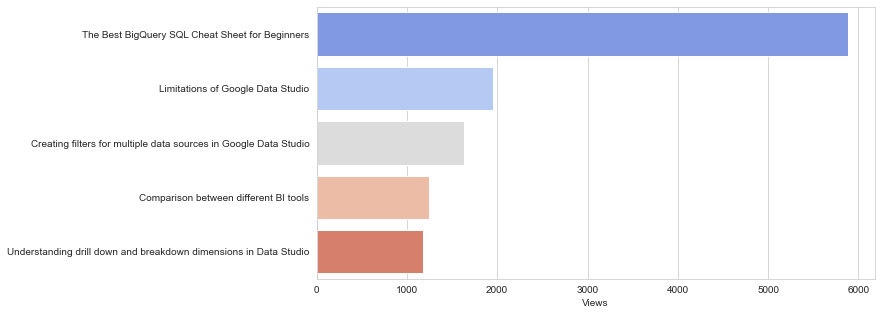

In [627]:
# Visualization of Top 5 performers by Views
plt.figure(figsize=(10,5))
temp = df_stats.sort_values(by='Views', ascending=False).head(5)
g = sns.barplot('Views', 'TitleName', data=temp, palette='coolwarm');
plt.ylabel('');

.

### Top read ratios



Read Ratio adjusts for the number of views, eliminating the bias that previously influenced Reads.
Read Ratio is comparable among most types of posts, no matter the context or popularity.
Read Ratio is a more meaningful twist on the traditional Reads count. Furthermore, it can still be easily understood as the percentage of viewers who stuck around and read the post

From the analysis we see the top performing topics for the readers are 'Third-party charts for Google data studio'
and 'Limitations of Google Data Studio'.
So Data Studio is the topic that keeps readers engaged.

/Users/deborahmenezes/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



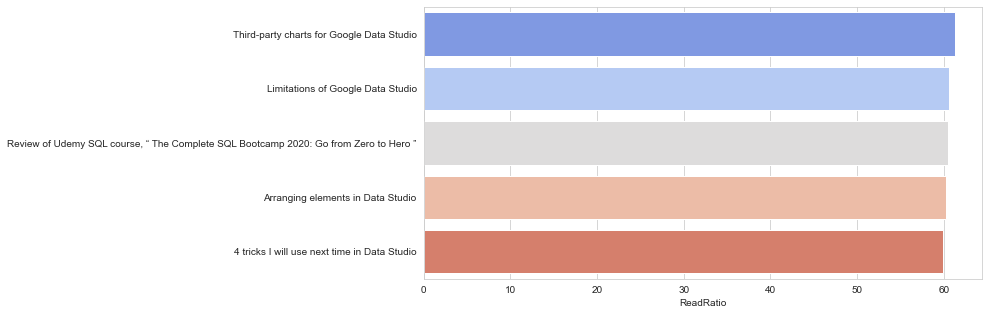

In [628]:
# Top read ratios
plt.figure(figsize=(10,5))
temp = df_stats.sort_values(by='ReadRatio', ascending=False).head(5)
g = sns.barplot('ReadRatio', 'TitleName', data=temp, palette='coolwarm');
plt.ylabel('');

.

### Top 5 performers by Fans

The top 5 medium stories that hold the most amount of fanbase, belongs to the very same one whhich holds the most number of views, which is 'The best BigQuery SQL cheat sheet for beginners' looks like did the best with more than 5000 total views till date. We can say that that is a significant corelation with the number of views and the fanbase as well.

/Users/deborahmenezes/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



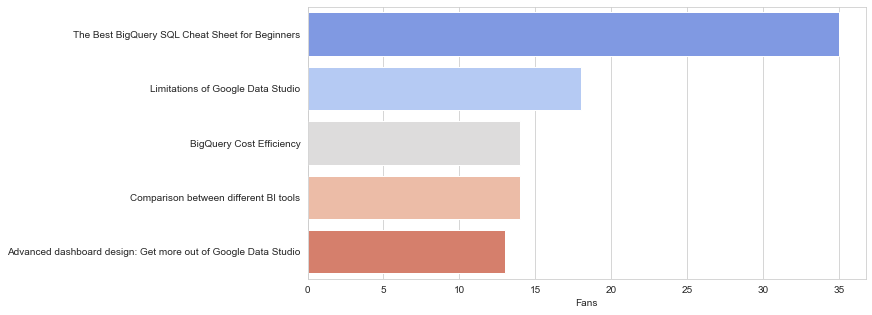

In [629]:
# Top 5 performers by Fans
plt.figure(figsize=(10,5))
temp = df_stats.sort_values(by='Fans', ascending=False).head()
g = sns.barplot('Fans', 'TitleName', data=temp, palette='coolwarm');
plt.ylabel('');

.

### Distribution of Fans per post

This confirms about the top two posts significantly outperforming the others from a Fans perspective. We see that my top two performing posts alone make up over 70% of my total views, even with ~30 stories. 

/Users/deborahmenezes/homebrew/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



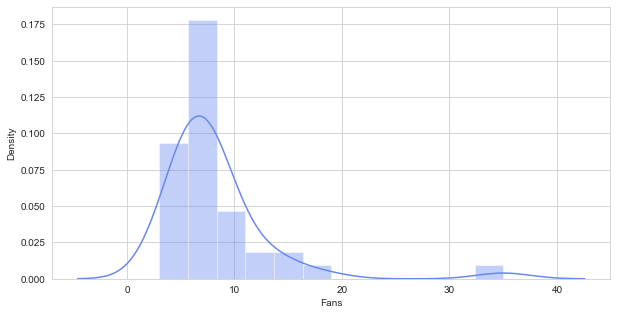

In [630]:
# Distribution of Fans per post
plt.figure(figsize=(10,5))
sns.distplot(df_stats['Fans'], bins=12);

.

###  Distribution of Fans per post

There appears to be a clear trend here. The shorter the post, the more likely a reader is to read it. This is intuitive, but nice to see that the data backs it up. What would be interesting to check out here is if longer posts are more likely to convert to fans? This would create a trade-off between engagement and value proposition. 

<AxesSubplot:xlabel='ReadTime', ylabel='ReadRatio'>

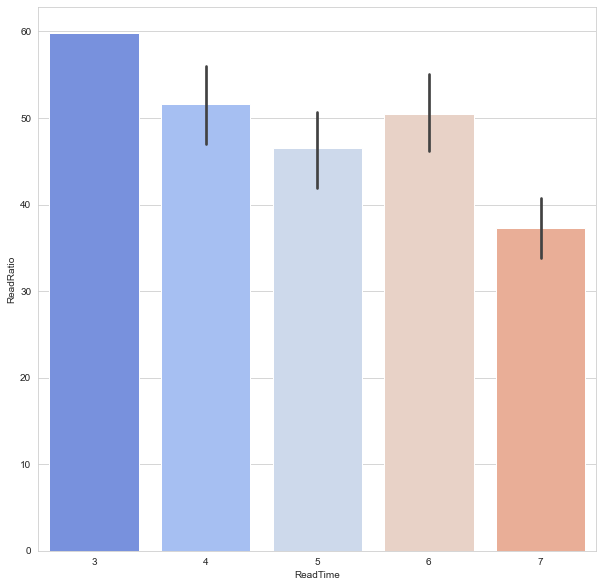

In [631]:
# Read time vs. read ratio
plt.figure(figsize=(10,10))
sns.barplot(x='ReadTime', y='ReadRatio', data=df_stats)

.

### Creating a feature called FanRatio

We already looked into Read Ratio metric above but by Read Ratio alone, you are simply seeing how engaging 
your post is, not necessarily how valuable it is to your readers, or how much they enjoyed it.
You can litter buzzwords and infographics throughout your post, but chances are that readers didn't find it particularly special.

So how do we judge how much readers enjoyed your post using what we have? With the data I have, 
I suggest Fans Ratio. This is simply calculated with Fans/Reads and I believe it will much more effectively 
describe how well recieved a given post is.

.

In [286]:
# Create feature
df_stats['FanRatio'] = (df_stats['Fans'] / df_stats['Views']) * 100
data = df_stats[['TitleName','PublishingName','Views','Fans', 'FanRatio']]
data.sort_values('FanRatio', ascending=False).head(10)

,TitleName,PublishingName,Views,Fans,FanRatio
39,Einführung in den neuen Vorschaumodus des Goog...,Data School,75,7,9.333333
0,Latest Updates on Google Data Analytics (Decem...,Geek Culture,57,5,8.771930
34,"Gute Gründe, warum wir einen Udemy Kurs machen",Data School,75,5,6.666667
1,The Wrangler User Interface of Cloud Data Fusion,NaN,62,4,6.451613
32,4 tricks I will use next time in Data Studio,Data School,137,8,5.839416
8,Missing features in Data Studio,Data School,240,11,4.583333
16,Arranging elements in Data Studio,Data School,131,6,4.580153
35,"5 BigQuery Tricks, die ich das nächste Mal anw...",Data School,143,6,4.195804
25,Latest Updates on Google Data Analytics (May 2...,Geek Culture,231,8,3.463203
12,Introduction to Cloud Dataprep,Data School,270,9,3.333333


.

Through feature extraction of a new column named 'FanRatio', It looks like that the topic of the stories are getting more readers because the ratio is spread across different publishing places such as Data School and Geek Culture. But could it be the case of simple bias? Even though a story got the most views, the fanbase is small ( is the story keeping the user engaged?)

.

/Users/deborahmenezes/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



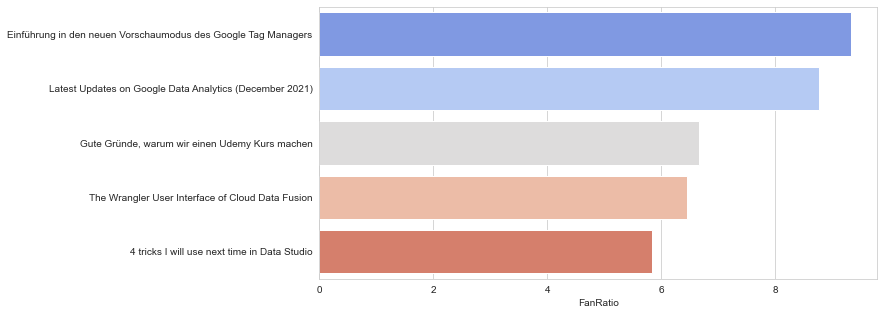

In [634]:
# Visualization
plt.figure(figsize=(10,5))
temp = df_stats.sort_values(by='FanRatio', ascending=False).head(5)
g = sns.barplot('FanRatio', 'TitleName', data=temp, palette='coolwarm');
plt.ylabel('');

.

In [635]:
# Group by publication
temp = df_stats.groupby('PublishingName').mean()['FanRatio']
temp = temp.sort_values(ascending=False)
print(temp)

PublishingName
Geek Culture    3.063734
Data School     2.675524
Name: FanRatio, dtype: float64


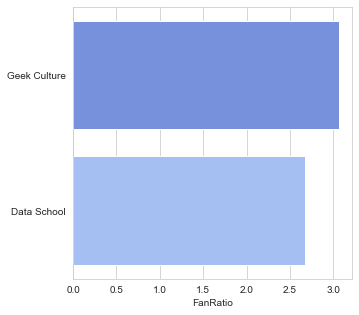

In [636]:
# Visualize publications effect on FanRatio
plt.figure(figsize=(5,5))
sns.barplot(x=temp, y=temp.index);
plt.ylabel('');

Looking at the mean between the two most publishing channels, we notice that the most amount of fanbase are from the Geek Culture publication

.

### Total posts on each publishing channels

A simple plot to underatnd if 'Geek Culture' has the most number of stories posted. Thats not the case though.
We see that Data School(26) has the most number of stories posted on the channel with far more difference compared to 'Geek culture'(9). We can say that if the stories were to be published in the right channels to get higher visibility therefore higher views

In [637]:
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
# PublishingName count
fig = px.histogram(df_stats, x="PublishingName")
fig.update_traces(marker_color="cornflowerblue",marker_line_color='rgb(8,48,107)',
                  marker_line_width=0.5)
fig.update_layout(title_text=' total posts on each publishing channels')
fig.show()

.

### Yearly count of stories

Since the medium channel was started during the late 2020, and currently we are in the 1st month of 2022, there is clear bias of data through the years. We will be able to get a steady rate of increase of stories in the coming months to get a better understanding of the data throughout the time.

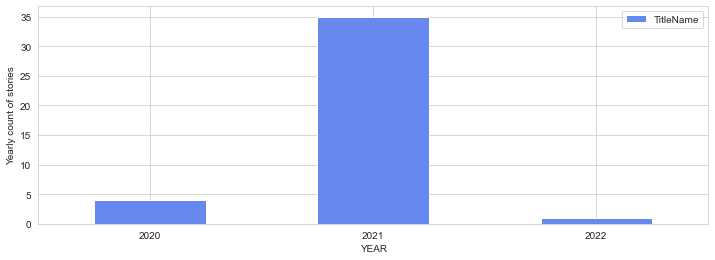

In [638]:
#Yearly count of stories
fig, axs = plt.subplots(figsize=(12, 4))

df_stats[['TitleName']].groupby([df_stats['createdAt'].dt.year]).count().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("YEAR");  # custom x label using matplotlib

plt.ylabel("Yearly count of stories");

In [699]:
# creating a dataframe for the year 2021 from the main table
df_stats_2021 = df_stats[df_stats.createdAt.dt.year == 2021]
df_stats_2021.head(2)

,TitleName,PublishingName,ReadTime,Views,Reads,ReadRatio,Fans,createdAt,claps,internalReferrerViews,primaryTopic_name,FanRatio,Date
1,The Wrangler User Interface of Cloud Data Fusion,None,5,62,37,59.677419,4,2021-12-23 13:13:23.249,200,17,NaN,6.451613,2021-12-23
2,Latest Updates on Google Data Analytics (Novem...,Geek Culture,4,195,89,45.641026,4,2021-12-01 09:56:11.190,200,54,NaN,2.051282,2021-12-01


.

### Number of Posts published in the year 2021

Now we can deep dive into the year 2021, and look at the data through the months.
We can see that 'august' was the month were most amount of the stories were published. Second to that were months from April to July, where July being the second highest.

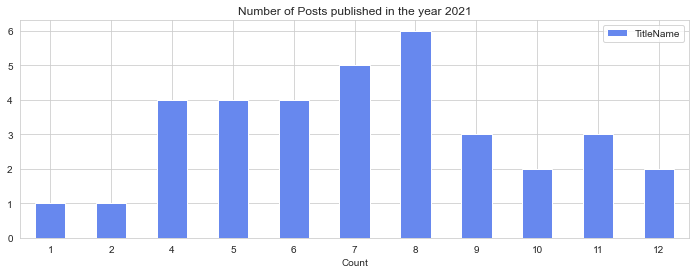

In [640]:
#Number of Posts published in the year 2021
fig, axs = plt.subplots(figsize=(12, 4))

df_stats_2021[['TitleName']].groupby([df_stats_2021['createdAt'].dt.month]).count().plot(
    kind='bar', rot=0, ax=axs
)
plt.xlabel("Year 2021");  # custom x label using matplotlib
plt.xlabel("Count");
plt.title("Number of Posts published in the year 2021");

.

###  Let's examine that trade-off and check out the relationship between Fan Ratio and Read Ratio.

With a higher and positive correlation, there will be some strong evidence to suggest a relationship between Read Ratio and Fan Ratio.
Better posts are not only engaging, but also enjoyable for the reader and more likely to receive applause

<Figure size 1440x1440 with 0 Axes>

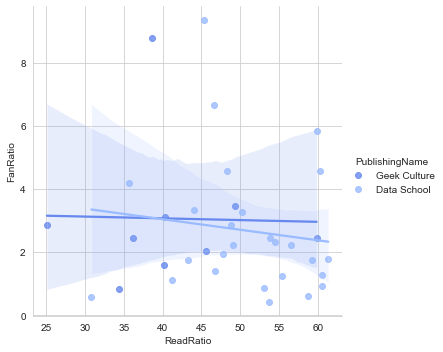

In [641]:
# Fan Ratio vs. Read Ratio
plt.figure(figsize=(20,20));
#scatter', 'hist', 'hex', 'kde', 'reg', 'resid'
sns.lmplot(x="ReadRatio", y="FanRatio", hue="PublishingName", data=df_stats)

.


The Pearson coefficient is a mathematical correlation coefficient representing the relationship between two variables, denoted as X and Y.

P value is the calculated probability of rejecting the Null Hypothesis, that is, the probability of findind similar results as a 'positive' or 'negative' effect in an experimental study if you were to repeat it with the whole dataset.

In [642]:
# calulatiing the Pearson coefficient and p value) to find the relationship between rread ratio and fan ratio metric
from scipy import stats
stats.pearsonr(df_stats['ReadRatio'], df_stats['FanRatio'])

(-0.023110478426526776, 0.887437492116615)

Pearson’s  (-0.023) ( negative co relation shows thhat there is no relationship between the two ratio metrics)
A p-value  (0.887)  (The p-value of 0.86 indicates that if there were no underlying difference)

.

### Count of claps per story scores

The highest claps are more than a 400 with the title being 'Comparison between different BI tools'

/Users/deborahmenezes/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



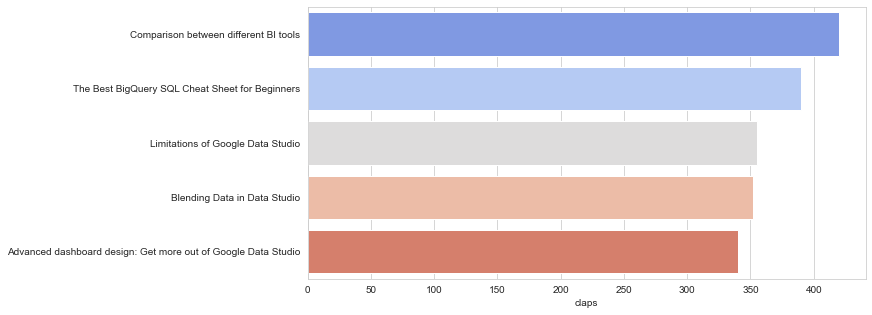

In [643]:
# Visualization of Count number of upvote scores of the stories
plt.figure(figsize=(10,5))
temp = df_stats.sort_values(by='claps', ascending=False).head(5)
g = sns.barplot('claps', 'TitleName', data=temp, palette='coolwarm');
plt.ylabel('');

.

### The stories that received the highest number of claps in a day

As we can see the stories like  'Lastest updates on Google Analytics (December 2021)', 'The Wrangler user Interface of cloud fusion' and 'Lastest updates on Google Analytics (November 2021)'  recieved traction i.e the highest number of claps received in a day 

/Users/deborahmenezes/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



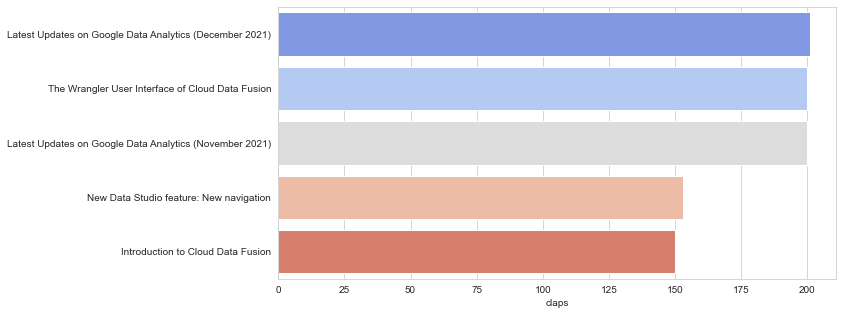

In [694]:
# Visualization of the stories that received the highest number of claps in a day
plt.figure(figsize=(10,5))
temp = df_stats.sort_values(by='Date', ascending=False).head(5)
g = sns.barplot('claps', 'TitleName', data=temp, palette='coolwarm');
plt.ylabel('');

.

### Claps distribution

I have narrowed in down to the variation in the clap distribution to find the days that received the most amount of claps 

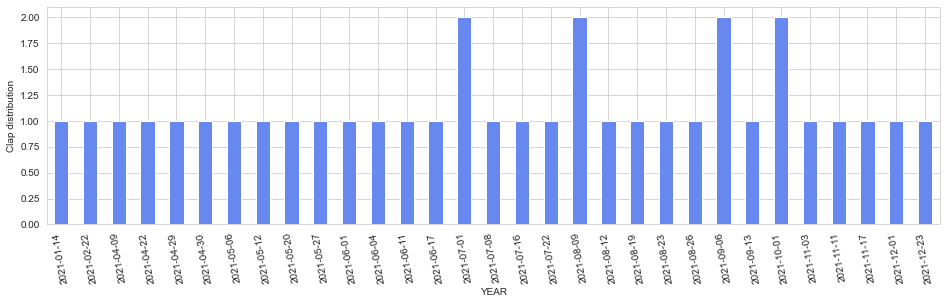

In [720]:
# Claps distribution during the year 2021
fig, axs = plt.subplots(figsize=(16, 4))

df_stats_2021['claps'].groupby([df_stats_2021['Date']]).count().plot(
    kind='bar', rot=100, ax=axs
)
plt.xlabel("YEAR");  

plt.ylabel("Clap distribution");

<AxesSubplot:ylabel='claps'>

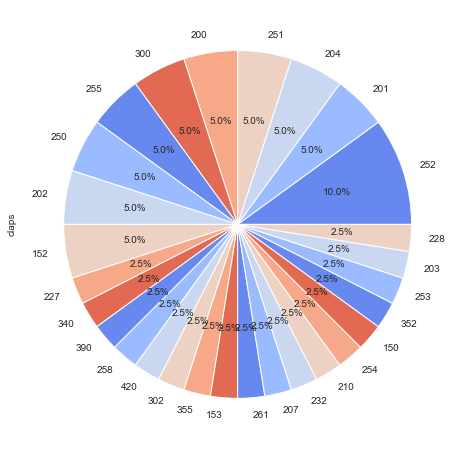

In [499]:
df_stats['claps'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

Pie chart doesnt give an understanding of the clap distribution, even though its visually appealing to the eyes it is not useful to get the clear picture of the data. 

### Top primary topic

For this purpose, using a pie chart gives an overview of the topics being used. As seen in the figure, we can notice that the primary topic or tags being used are 'Data Science' and 'Programming'

<AxesSubplot:ylabel='primaryTopic_name'>

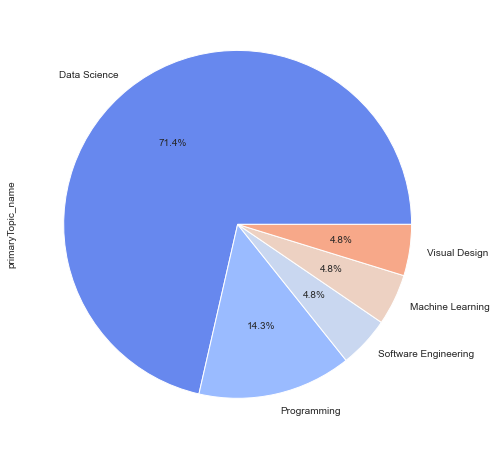

In [724]:
# The various tags associated with the stories
df_stats['primaryTopic_name'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

### Top 5 stories which are internally referred

Internal referral views are how many times the story has been viewed in the selected time period from within the Medium distribution, including our homepage, app, emails, and social media accounts

/Users/deborahmenezes/homebrew/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



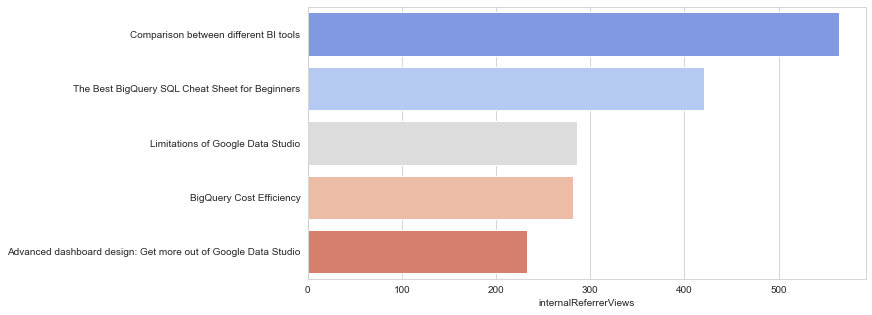

In [732]:
# Top 5 stories which are internally referred
plt.figure(figsize=(10,5))
temp = df_stats.sort_values(by='internalReferrerViews', ascending=False).head(5)
g = sns.barplot( 'internalReferrerViews', 'TitleName', data=temp, palette='coolwarm');
plt.ylabel('');

## Scatter plot of reading time and claps

We have already seen the analysis of ReadTime and claps relation. But this graph is more precise and looks decent


In [526]:
fig5 = px.scatter(df_stats, y='claps', x='ReadTime')
fig5.show()

### Correlations between all the columns
Let’s see the correlations between the columns, and check if we can find anything interesting

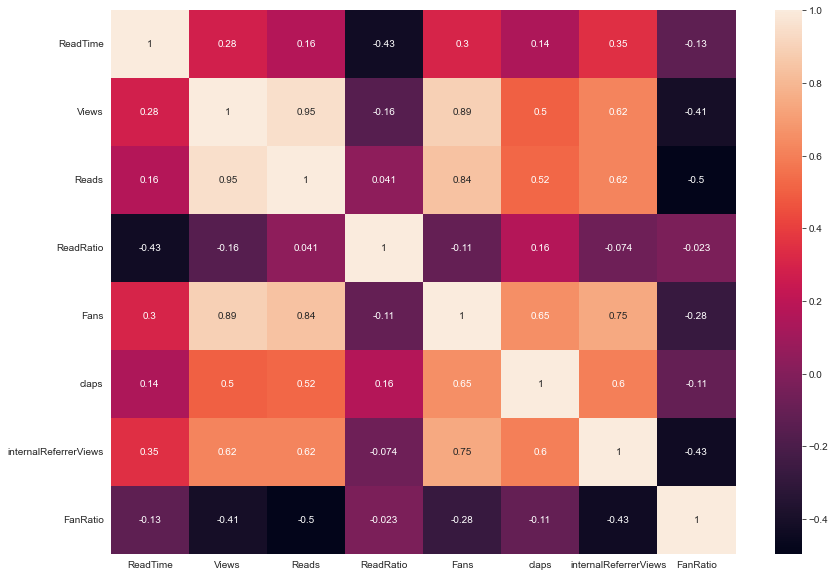

In [723]:
f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df_stats.corr(),annot = True)
plt.show()

In my conclusion we can observe that the Fans are correlated to the number of Views. That makes sense, the value we get between the two metric should be closer to 1 to find any significant differnce. The number of Internal Referrer Views has a correlation of 0.75 with the fans column. The two highest values we can see form the graph are 0.95 (Views and reads), 0.89 ( Fans & Views ) and 0.84 ( Fans & Reads)

In [333]:
# since the values that are scrapped is a string type, it should be converted into float.
def convert_string_to_number(a):
    if isinstance(a, str):
        if 'K' in a:
            a = a.strip('K')
            a = int(a)
            a = a*1000
        else:
            a = int(a)
    return a


## Pie chart of overall external views

External traffic refers to all traffic your article receives not through Medium’s distribution channels. This can include stories shared on social media, articles found through a Google search, or accessing the article through a direct link in a writer’s newsletter.

Email, IM, and direct refers to traffic not originating from Medium’s site, including email links (i.e. me, sending you an email with a link to my article), IM would be links sent through chat functions or messengers (Google Chat, Slack, etc.) and direct is someone going straight to the article, which could be someone manually entering the URL, finding the article in their history/browser suggestions, or through their page bookmarks.

We can see that most of the external views are through email/IM and direct

<AxesSubplot:ylabel='None'>

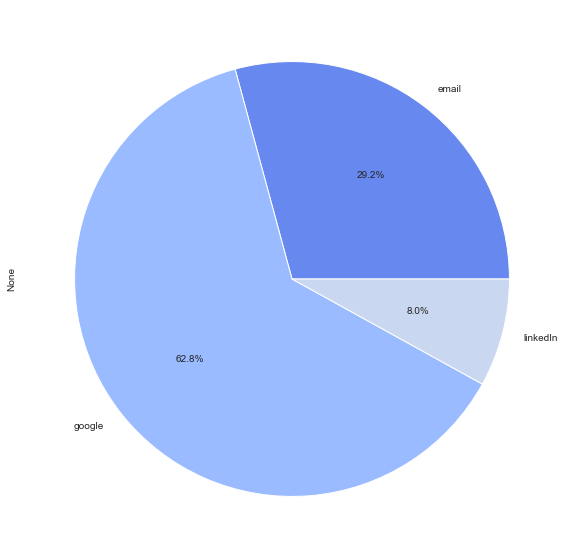

In [345]:
#using the fucntion convert_string_to_number in order to convert to its respective data structre
df_stats['Emails'] = df_stats['Emails'].apply(lambda x: convert_string_to_number(x))
df_stats['Google'] = df_stats['Google'].apply(lambda x: convert_string_to_number(x))
df_stats['linkedIn'] = df_stats['linkedIn'].apply(lambda x: convert_string_to_number(x))

df_stats.Emails = df_stats.Emails.astype(int)
df_stats.Google = df_stats.Google.astype(int)
df_stats.linkedIn = df_stats.linkedIn.astype(int)

#Adding the referrals to get a broader perspective
total_referrals = sum(df_stats.Emails + df_stats.Google + df_stats.linkedIn)
total_emails = sum(df_stats.Emails)
total_google = sum(df_stats.Google)
total_linkedIn = sum(df_stats.linkedIn)

#Creating new features such as email_ratio to calculate the total column wise ratio etc
email_ratio1 = total_emails/total_referrals
google_ratio1 = total_google/total_referrals
linkedIn_ratio1 = total_linkedIn/total_referrals

#A pie chart to show the overall external views
ratio_list = [email_ratio1, google_ratio1, linkedIn_ratio1]
ratio_series = pd.Series(ratio_list)
ratio_series.plot(kind='pie',figsize=(12,10), labels = ['email', 'google', 'linkedIn'], autopct='%1.1f%%')

In [346]:
#Creating new features such as email_ratio to calculate the total row wise ratio etc
df_stats['email_ratio'] = df_stats.apply(lambda row: row.Emails*100/(row.Emails + row.Google + row.linkedIn), axis=1)
df_stats['google_ratio'] = df_stats.apply(lambda row: row.Google*100/(row.Emails + row.Google + row.linkedIn), axis=1)
df_stats['linkedIn_ratio'] = df_stats.apply(lambda row: row.linkedIn*100/(row.Emails + row.Google + row.linkedIn), axis=1)

#individually taking all the top articles in order to plot and find the best articles
top_google_articles = df_stats.sort_values(by='google_ratio', ascending=False).head(5)
top_email_articles = df_stats.sort_values(by='email_ratio', ascending=False).head(5)
top_linkedIn_articles = df_stats.sort_values(by='linkedIn_ratio', ascending=False).head(5)



##  Top 5 stories which are externally referred through Email/ IM and direct

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


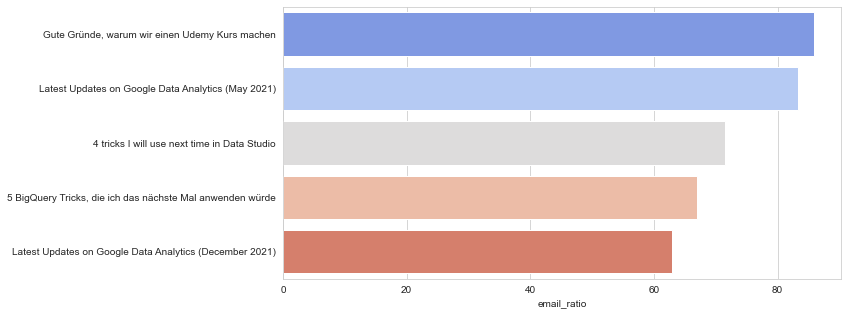

In [347]:
# Top 5 stories which are externally referred through Email
plt.figure(figsize=(10,5))
temp = top_email_articles
g = sns.barplot( 'email_ratio', 'TitleName', data=temp, palette='coolwarm');
plt.ylabel('');

##  Top 5 stories which are externally referred through Google

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


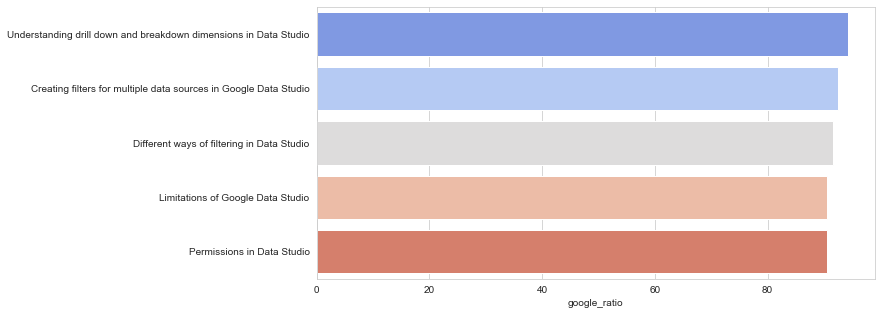

In [348]:
# Top 5 stories which are externally referred through Google
plt.figure(figsize=(10,5))
temp = top_google_articles
g = sns.barplot( 'google_ratio', 'TitleName', data=temp, palette='coolwarm');
plt.ylabel('');

##  Top 5 stories which are externally referred through linkedIn

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


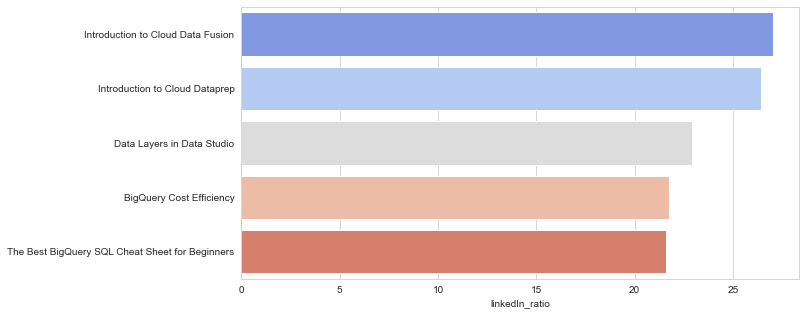

In [349]:
# Top 5 stories which are externally referred through linkedIn
plt.figure(figsize=(10,5))
temp = top_linkedIn_articles
g = sns.barplot( 'linkedIn_ratio', 'TitleName', data=temp, palette='coolwarm');
plt.ylabel('');